In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

import pandas as pd 
import scipy.stats as stats
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
%pwd


'C:\\Users\\ARYAN SHARMA'

In [3]:
%cd "C:\Users\ARYAN SHARMA\NTCC\CREDIT RISK ANALYTICS"

C:\Users\ARYAN SHARMA\NTCC\CREDIT RISK ANALYTICS


In [4]:
bankloans = pd.read_csv('bankloans.csv')
bankloans.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

In [5]:
bankloans.age.min()

20

In [6]:
sum = 0

In [11]:
while(bankloans.age>=40):
    sum = sum + bankloans.income
print(sum)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [22]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [23]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [24]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [25]:
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [26]:
pandas_profiling.ProfileReport(bankloans)

In [27]:
numeric_var_names = [key for key in dict(bankloans.dtypes) 
                     if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]

In [28]:
print(numeric_var_names)
print(cat_var_names)

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']
[]


In [29]:
bankloans_num = bankloans[numeric_var_names]

In [30]:
num_summary = bankloans_num.apply(continuous_var_summary).T
num_summary

N  NMISS           SUM       MEAN     MEDIAN        STD  \
age       850.0    0.0  29775.000000  35.029412  34.000000   8.041432   
ed        850.0    0.0   1454.000000   1.710588   1.000000   0.927784   
employ    850.0    0.0   7281.000000   8.565882   7.000000   6.777884   
address   850.0    0.0   7116.000000   8.371765   7.000000   6.895016   
income    850.0    0.0  39674.000000  46.675294  35.000000  38.543054   
debtinc   850.0    0.0   8645.900000  10.171647   8.700000   6.719441   
creddebt  850.0    0.0   1340.284021   1.576805   0.885091   2.125840   
othdebt   850.0    0.0   2616.970979   3.078789   2.003243   3.398803   
default   700.0  150.0    183.000000   0.261429   0.000000   0.439727   

                  VAR        MIN         P1         P5        P10        P25  \
age         64.664623  20.000000  21.000000  23.000000  25.000000  29.000000   
ed           0.860783   1.000000   1.000000   1.000000   1.000000   1.000000   
employ      45.939706   0.000000   0.000000   0.000000   1.000000   3.000000   
address     47.541251   0.000000   0.000000   0.000000   1.000000   3.000000   
income    1485.566998  13.000000  14.490000  17.000000  19.000000  24.000000   
debtinc     45.150891   0.100000   0.900000   1.900000   2.900000   5.100000   
creddebt     4.519196   0.011696   0.030349   0.108927   0.178306   0.382176   
othdebt     11.551864   0.045584   0.162394   0.359900   0.552050   1.045942   
default      0.193360   0.000000   0.000000   0.000000   0.000000   0.000000   

                P50        P75        P90         P95         P99        MAX  
age       34.000000  41.000000  47.000000   49.000000   53.000000   56.00000  
ed         1.000000   2.000000   3.000000    4.000000    4.000000    5.00000  
employ     7.000000  13.000000  18.000000   21.550000   29.000000   33.00000  
address    7.000000  12.000000  19.000000   22.550000   26.510000   34.00000  
income    35.000000  55.750000  84.000000  115.550000  220.510000  446.00000  
debtinc    8.700000  13.800000  19.200000   23.510000   31.565000   41.30000  
creddebt   0.885091   1.898440   3.703304    5.348674   10.285997   20.56131  
othdebt    2.003243   3.903001   7.111941    9.481105   16.931503   35.19750  
default    0.000000   1.000000   1.000000    1.000000    1.000000    1.00000

In [31]:
bankloans_existing = bankloans_num[bankloans_num.default.isnull() == 0]
bankloans_new = bankloans_num[bankloans_num.default.isnull() == 1]
print(bankloans_existing.shape)
print(bankloans_new.shape)

(700, 9)
(150, 9)


In [32]:
bankloans_existing = bankloans_existing.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.dropna().quantile(0.99)))

In [33]:
bankloans_existing = bankloans_existing.apply(lambda x: missing_imputation(x))

In [34]:
corr_matrix = bankloans_existing.corr()
corr_matrix.to_csv('corr.csv')

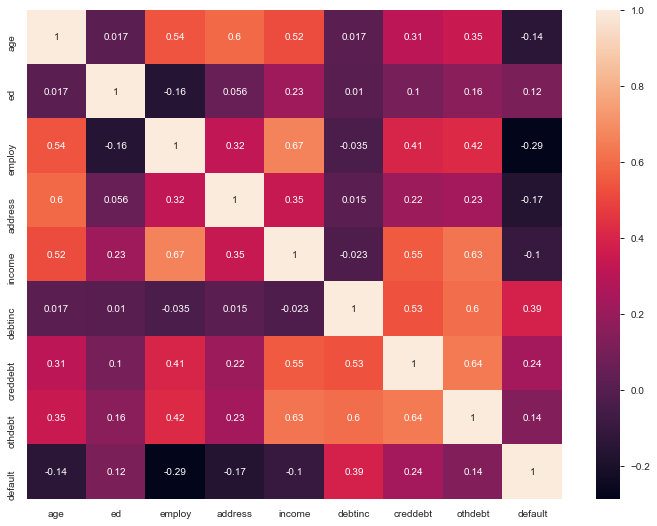

In [35]:
plt.figure(figsize = (12, 9))
sns.heatmap(bankloans_existing.corr(), annot=True)

In [36]:
import statsmodels.formula.api as sm

In [37]:
train, test = train_test_split(bankloans_existing, test_size = 0.3, random_state =  42)

In [38]:
train.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [39]:
#Tried using all varables'default ~ age + ed + employ + address + income + debtinc + creddebt + othdebt'

In [40]:
m=sm.logit(formula='default ~ age + ed + employ + address + income + debtinc + creddebt + othdebt',
          data=train).fit()

Optimization terminated successfully.
         Current function value: 0.425391
         Iterations 7


In [41]:
print(m.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.275     
Dependent Variable: default          AIC:              434.8834  
Date:               2020-08-17 14:21 BIC:              472.6330  
No. Observations:   490              Log-Likelihood:   -208.44   
Df Model:           8                LL-Null:          -287.47   
Df Residuals:       481              LLR p-value:      4.0651e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.3844    0.7360  -1.8808  0.0600  -2.8270   0.0582
age            0.0389    0.0202   1.9237  0.0544  -0.0007   0.0784
ed             0.0080    0.1423   0.0563  0.9551  -0.2709   0.2870
employ        -0.2650    0.039

In [42]:
m1 = sm.logit(formula = 'default ~ age + employ + address + debtinc + creddebt + othdebt', 
                  data = train).fit() 

Optimization terminated successfully.
         Current function value: 0.425961
         Iterations 7


In [43]:
print(m1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.274     
Dependent Variable: default          AIC:              431.4417  
Date:               2020-08-17 14:21 BIC:              460.8025  
No. Observations:   490              Log-Likelihood:   -208.72   
Df Model:           6                LL-Null:          -287.47   
Df Residuals:       483              LLR p-value:      1.9998e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.6286    0.5966  -2.7296  0.0063  -2.7979  -0.4592
age            0.0376    0.0201   1.8696  0.0615  -0.0018   0.0770
employ        -0.2670    0.0374  -7.1313  0.0000  -0.3404  -0.1936
address       -0.0870    0.025

In [44]:
m2 = sm.logit(formula = 'default ~ age + employ + address + debtinc + creddebt ', 
                  data = train).fit() 

Optimization terminated successfully.
         Current function value: 0.427051
         Iterations 7


In [45]:
print(m2.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.272     
Dependent Variable: default          AIC:              430.5102  
Date:               2020-08-17 14:21 BIC:              455.6766  
No. Observations:   490              Log-Likelihood:   -209.26   
Df Model:           5                LL-Null:          -287.47   
Df Residuals:       484              LLR p-value:      5.6901e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.7615    0.5836  -3.0185  0.0025  -2.9053  -0.6177
age            0.0392    0.0201   1.9528  0.0508  -0.0001   0.0785
employ        -0.2541    0.0348  -7.3056  0.0000  -0.3223  -0.1860
address       -0.0839    0.025

In [46]:
somersd_df = pd.DataFrame()

for num_variable in bankloans_existing.columns.difference(['default']):
    
   
    logreg = sm.logit(formula = str('default ~ ') + str(num_variable), data = bankloans_existing).fit()
    
    
    y_score = pd.DataFrame(logreg.predict())
    
    y_score.columns = ['Score']
   
    somers_d = 2 * metrics.roc_auc_score(bankloans_existing['default'], y_score) - 1
   
    temp = pd.DataFrame([num_variable, somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567774
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565619
         Iterations 5


In [47]:
somersd_df.sort_values(by = 'SomersD', ascending = False)

Variable Name   SomersD
0       debtinc  0.470506
0        employ  0.409138
0      creddebt  0.272378
0       address  0.222384
0           age  0.206329
0        income  0.200273
0       othdebt  0.173806
0            ed  0.148302

In [53]:
train['pred_prob'] = m2.predict(train)
train_predict = m2.predict(train)
test_predict = m2.predict(test)
train.head(20)

C:\Users\ARYAN SHARMA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


age  ed  employ  address  income  debtinc  creddebt    othdebt  default  \
357  24.0   2     0.0      2.0    15.0   16.100  0.321195   2.093805      1.0   
649  29.0   2     5.0      7.0    28.0   18.700  2.125816   3.110184      0.0   
291  33.0   4     9.0      8.0    32.0    5.500  0.496320   1.263680      0.0   
420  46.0   1     1.0     15.0    21.0   14.800  1.376844   1.731156      1.0   
177  28.0   2     7.0      2.0    34.0    7.000  0.359380   2.020620      0.0   
456  37.0   4     9.0     16.0   177.0    5.900  0.887655   9.555345      0.0   
444  43.0   4    18.0     14.0   190.3    6.500  9.891428  12.958530      1.0   
83   35.0   4     4.0     16.0    29.0   11.000  1.843820   1.346180      0.0   
453  39.0   1     0.0      8.0    39.0    7.900  1.066026   2.014974      0.0   
354  41.0   3    18.0      6.0    71.0   15.700  6.565583   4.581417      1.0   
536  34.0   2     9.0      7.0    27.0    1.700  0.295137   0.163863      0.0   
576  24.0   1     8.0      0.0    17.0    5.600  0.569296   0.382704      1.0   
79   36.0   1    15.0     10.0    39.0    3.200  0.686400   0.561600      0.0   
23   29.0   1     8.0      6.0    27.0    9.800  0.402192   2.243808      0.0   
15   36.0   2     9.0      6.0    49.0    8.600  0.817516   3.396484      1.0   
381  48.0   1    13.0     20.0    50.0   30.701  6.113800   9.286200      1.0   
292  51.0   2    19.0     25.0   159.0    2.800  1.068480   3.383520      0.0   
275  27.0   2     1.0      0.0    20.0   10.300  0.376980   1.683020      1.0   
654  36.0   1    11.0      2.0    33.0   30.701  1.265550   9.459450      0.0   
314  31.0   4     1.0      6.0    29.0   11.100  1.065489   2.153511      0.0   

     pred_prob  
357   0.585803  
649   0.529728  
291   0.060701  
420   0.599717  
177   0.130221  
456   0.047856  
444   0.637876  
83    0.296777  
453   0.573234  
354   0.454658  
536   0.047128  
576   0.107590  
79    0.012572  
23    0.097529  
15    0.114948  
381   0.727715  
292   0.002871  
275   0.499827  
654   0.407165  
314   0.530538

In [54]:
print("Response rate (Proportion of 1 vs 0):", train['default'].mean())
print("Average of predicted probalities:", train_predict.mean())

Response rate (Proportion of 1 vs 0): 0.27346938775510204
Average of predicted probalities: 0.27346938775510227


In [55]:
# model accuracy with cut-off value equal to response rate
metrics.accuracy_score( train['default'],
                            train_predict>0.27)


0.7387755102040816

In [56]:
train_auc = metrics.roc_auc_score(train['default'], train_predict)
test_auc = metrics.roc_auc_score(test['default'], test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.838210632232098
The AUC for the model built on the Test Data is :  0.8885790340981113


In [57]:
train_predicted_prob = pd.DataFrame(train_predict)
train_predicted_prob.columns = ['prob']

# making a DataFrame with actual and prob columns
train_pf = pd.concat([train['default'], train_predicted_prob], axis = 1)
train_pf.columns = ['actual', 'prob']

In [58]:
test_predicted_prob = pd.DataFrame(test_predict)
test_predicted_prob.columns = ['prob']

# making a DataFrame with actual and prob columns
test_pf = pd.concat([test['default'], test_predicted_prob], axis=1)
test_pf.columns = ['actual','prob']

test_pf.head()

actual      prob
158     1.0  0.213639
500     0.0  0.462511
396     0.0  0.058998
155     0.0  0.296444
321     1.0  0.300336

In [59]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( train['default'],
                            train_predict>0.2,[1,0])
cm

array([[119,  15],
       [131, 225]], dtype=int64)

In [60]:
train['default'].value_counts()

0.0    356
1.0    134
Name: default, dtype: int64

In [61]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 12.5, 'Predicted label')

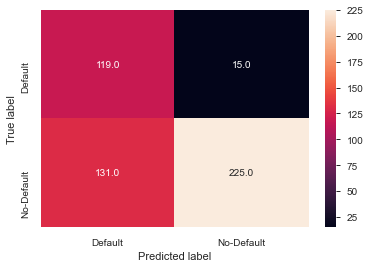

In [62]:
sn.heatmap(cm, annot=True,  fmt='.1f', xticklabels = ["Default", "No-Default"] , yticklabels = ["Default", "No-Default"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [63]:
roc_like_df = pd.DataFrame()
train_temp = train_pf.copy()

for cut_off in np.linspace(0,1,1000):
    
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

roc_like_df['senstivity+specificity'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df

cutoff  sensitivity  specificity  accuracy  senstivity+specificity
0   0.000000          1.0     0.000000  0.273469                1.000000
0   0.001001          1.0     0.000000  0.273469                1.000000
0   0.002002          1.0     0.014045  0.283673                1.014045
0   0.003003          1.0     0.028090  0.293878                1.028090
0   0.004004          1.0     0.042135  0.304082                1.042135
..       ...          ...          ...       ...                     ...
0   0.995996          0.0     1.000000  0.726531                1.000000
0   0.996997          0.0     1.000000  0.726531                1.000000
0   0.997998          0.0     1.000000  0.726531                1.000000
0   0.998999          0.0     1.000000  0.726531                1.000000
0   1.000000          0.0     1.000000  0.726531                1.000000

[1000 rows x 5 columns]

In [64]:
# cut-off based on highest sum(sensitivity + specicity)
roc_like_df[roc_like_df['senstivity+specificity'] == roc_like_df['senstivity+specificity'].max()]

cutoff  sensitivity  specificity  accuracy  senstivity+specificity
0  0.216216     0.880597     0.654494  0.716327                1.535091

In [65]:
test_pf['predicted'] = test_pf['prob'].apply(lambda x: 1 if x > 0.22 else 0)
train_pf['predicted'] = train_pf['prob'].apply(lambda x: 1 if x > 0.22 else 0)

In [66]:
# confusion matrix of training dataset
pd.crosstab(train_pf['actual'], train_pf['predicted'])

predicted    0    1
actual             
0.0        235  121
1.0         18  116

In [67]:
pd.crosstab(test_pf['actual'], test_pf['predicted'])

predicted    0   1
actual            
0.0        116  45
1.0          6  43

In [68]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_pf.actual, train_pf.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_pf.actual, test_pf.predicted))

The overall accuracy score for the Train Data is :  0.7163265306122449
The overall accuracy score for the Test Data  is :  0.7571428571428571


In [69]:
# predciting new customers good or bad
bankloans_new.head()

age  ed  employ  address  income  debtinc  creddebt   othdebt  default
700   36   1      16       13      32     10.9  0.544128  2.943872      NaN
701   50   1       6       27      21     12.9  1.316574  1.392426      NaN
702   40   1       9        9      33     17.0  4.880700  0.729300      NaN
703   31   1       5        7      23      2.0  0.046000  0.414000      NaN
704   29   1       4        0      24      7.8  0.866736  1.005264      NaN

In [70]:
bankloans_new['prob'] = m1.predict(bankloans_new)
bankloans_new.head()

C:\Users\ARYAN SHARMA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


age  ed  employ  address  income  debtinc  creddebt   othdebt  default  \
700   36   1      16       13      32     10.9  0.544128  2.943872      NaN   
701   50   1       6       27      21     12.9  1.316574  1.392426      NaN   
702   40   1       9        9      33     17.0  4.880700  0.729300      NaN   
703   31   1       5        7      23      2.0  0.046000  0.414000      NaN   
704   29   1       4        0      24      7.8  0.866736  1.005264      NaN   

         prob  
700  0.010575  
701  0.108498  
702  0.630327  
703  0.096342  
704  0.356594

In [71]:
bankloans_new['default'] = bankloans_new['prob'].apply(lambda x: 1 if x > 0.22 else 0)

C:\Users\ARYAN SHARMA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
bankloans_new.default.value_counts()

0    82
1    68
Name: default, dtype: int64

We are rejecting applications for 68 customers based on cut-off = 0.22